# Exploratory Data Analysis on Data Science Salaries

AUTHOR - SEHAJ MALHOTRA

*LINKEDIN - https://www.linkedin.com/in/sehajmalhotra/* 

*KAGGLE - https://www.kaggle.com/sehaj2001*

*DATASET - https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

In [2]:
data = pd.read_csv('ds_salaries.csv')

In [3]:
data.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [4]:
data.describe()

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
data.duplicated().sum()

1171

In [8]:
data['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [9]:
data['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [10]:
data['job_title'].nunique()

93

In [11]:
data['salary_currency'].value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [12]:
data.drop(data[['salary','salary_currency']], axis = 1, inplace = True)

In [13]:
data['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [14]:
data['experience_level'] = data['experience_level'].replace('EN','Entry-level/Junior')
data['experience_level'] = data['experience_level'].replace('MI','Mid-level/Intermediate')
data['experience_level'] = data['experience_level'].replace('SE','Senior-level/Expert')
data['experience_level'] = data['experience_level'].replace('EX','Executive-level/Director')

In [15]:
data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [16]:
data['company_size'] = data['company_size'].replace('L','Large')
data['company_size'] = data['company_size'].replace('S','Small')
data['company_size'] = data['company_size'].replace('M','Medium')

In [17]:
data['remote_ratio'].unique()

array([100,   0,  50], dtype=int64)

In [18]:
data['remote_ratio'] = data['remote_ratio'].map({100:'On-Site', 0:'Work from home', 50: 'Hybrid'})

In [19]:
data['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [20]:
data = data[~data['employment_type'].isin(['CT', 'FL'])]

In [21]:
data['employment_type'] = data['employment_type'].replace('FT','Full-Time')
data['employment_type'] = data['employment_type'].replace('PT','Part-Time')

In [22]:
data['employment_type'].value_counts()

Full-Time    3718
Part-Time      17
Name: employment_type, dtype: int64

In [23]:
data

work_year        experience_level employment_type  \
0          2023     Senior-level/Expert       Full-Time   
3          2023     Senior-level/Expert       Full-Time   
4          2023     Senior-level/Expert       Full-Time   
5          2023     Senior-level/Expert       Full-Time   
6          2023     Senior-level/Expert       Full-Time   
...         ...                     ...             ...   
3749       2021     Senior-level/Expert       Full-Time   
3750       2020     Senior-level/Expert       Full-Time   
3751       2021  Mid-level/Intermediate       Full-Time   
3752       2020      Entry-level/Junior       Full-Time   
3754       2021     Senior-level/Expert       Full-Time   

                     job_title  salary_in_usd employee_residence  \
0     Principal Data Scientist          85847                 ES   
3               Data Scientist         175000                 CA   
4               Data Scientist         120000                 CA   
5            Applied Scientist         222200                 US   
6            Applied Scientist         136000                 US   
...                        ...            ...                ...   
3749           Data Specialist         165000                 US   
3750            Data Scientist         412000                 US   
3751  Principal Data Scientist         151000                 US   
3752            Data Scientist         105000                 US   
3754      Data Science Manager          94665                 IN   

        remote_ratio company_location company_size  
0            On-Site               ES        Large  
3            On-Site               CA       Medium  
4            On-Site               CA       Medium  
5     Work from home               US        Large  
6     Work from home               US        Large  
...              ...              ...          ...  
3749         On-Site               US        Large  
3750         On-Site               US        Large  
3751         On-Site               US        Large  
3752         On-Site               US        Small  
3754          Hybrid               IN        Large  

[3735 rows x 9 columns]

In [24]:
ex_level = data['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Experience Level')
fig.show()

## Univariate analysis

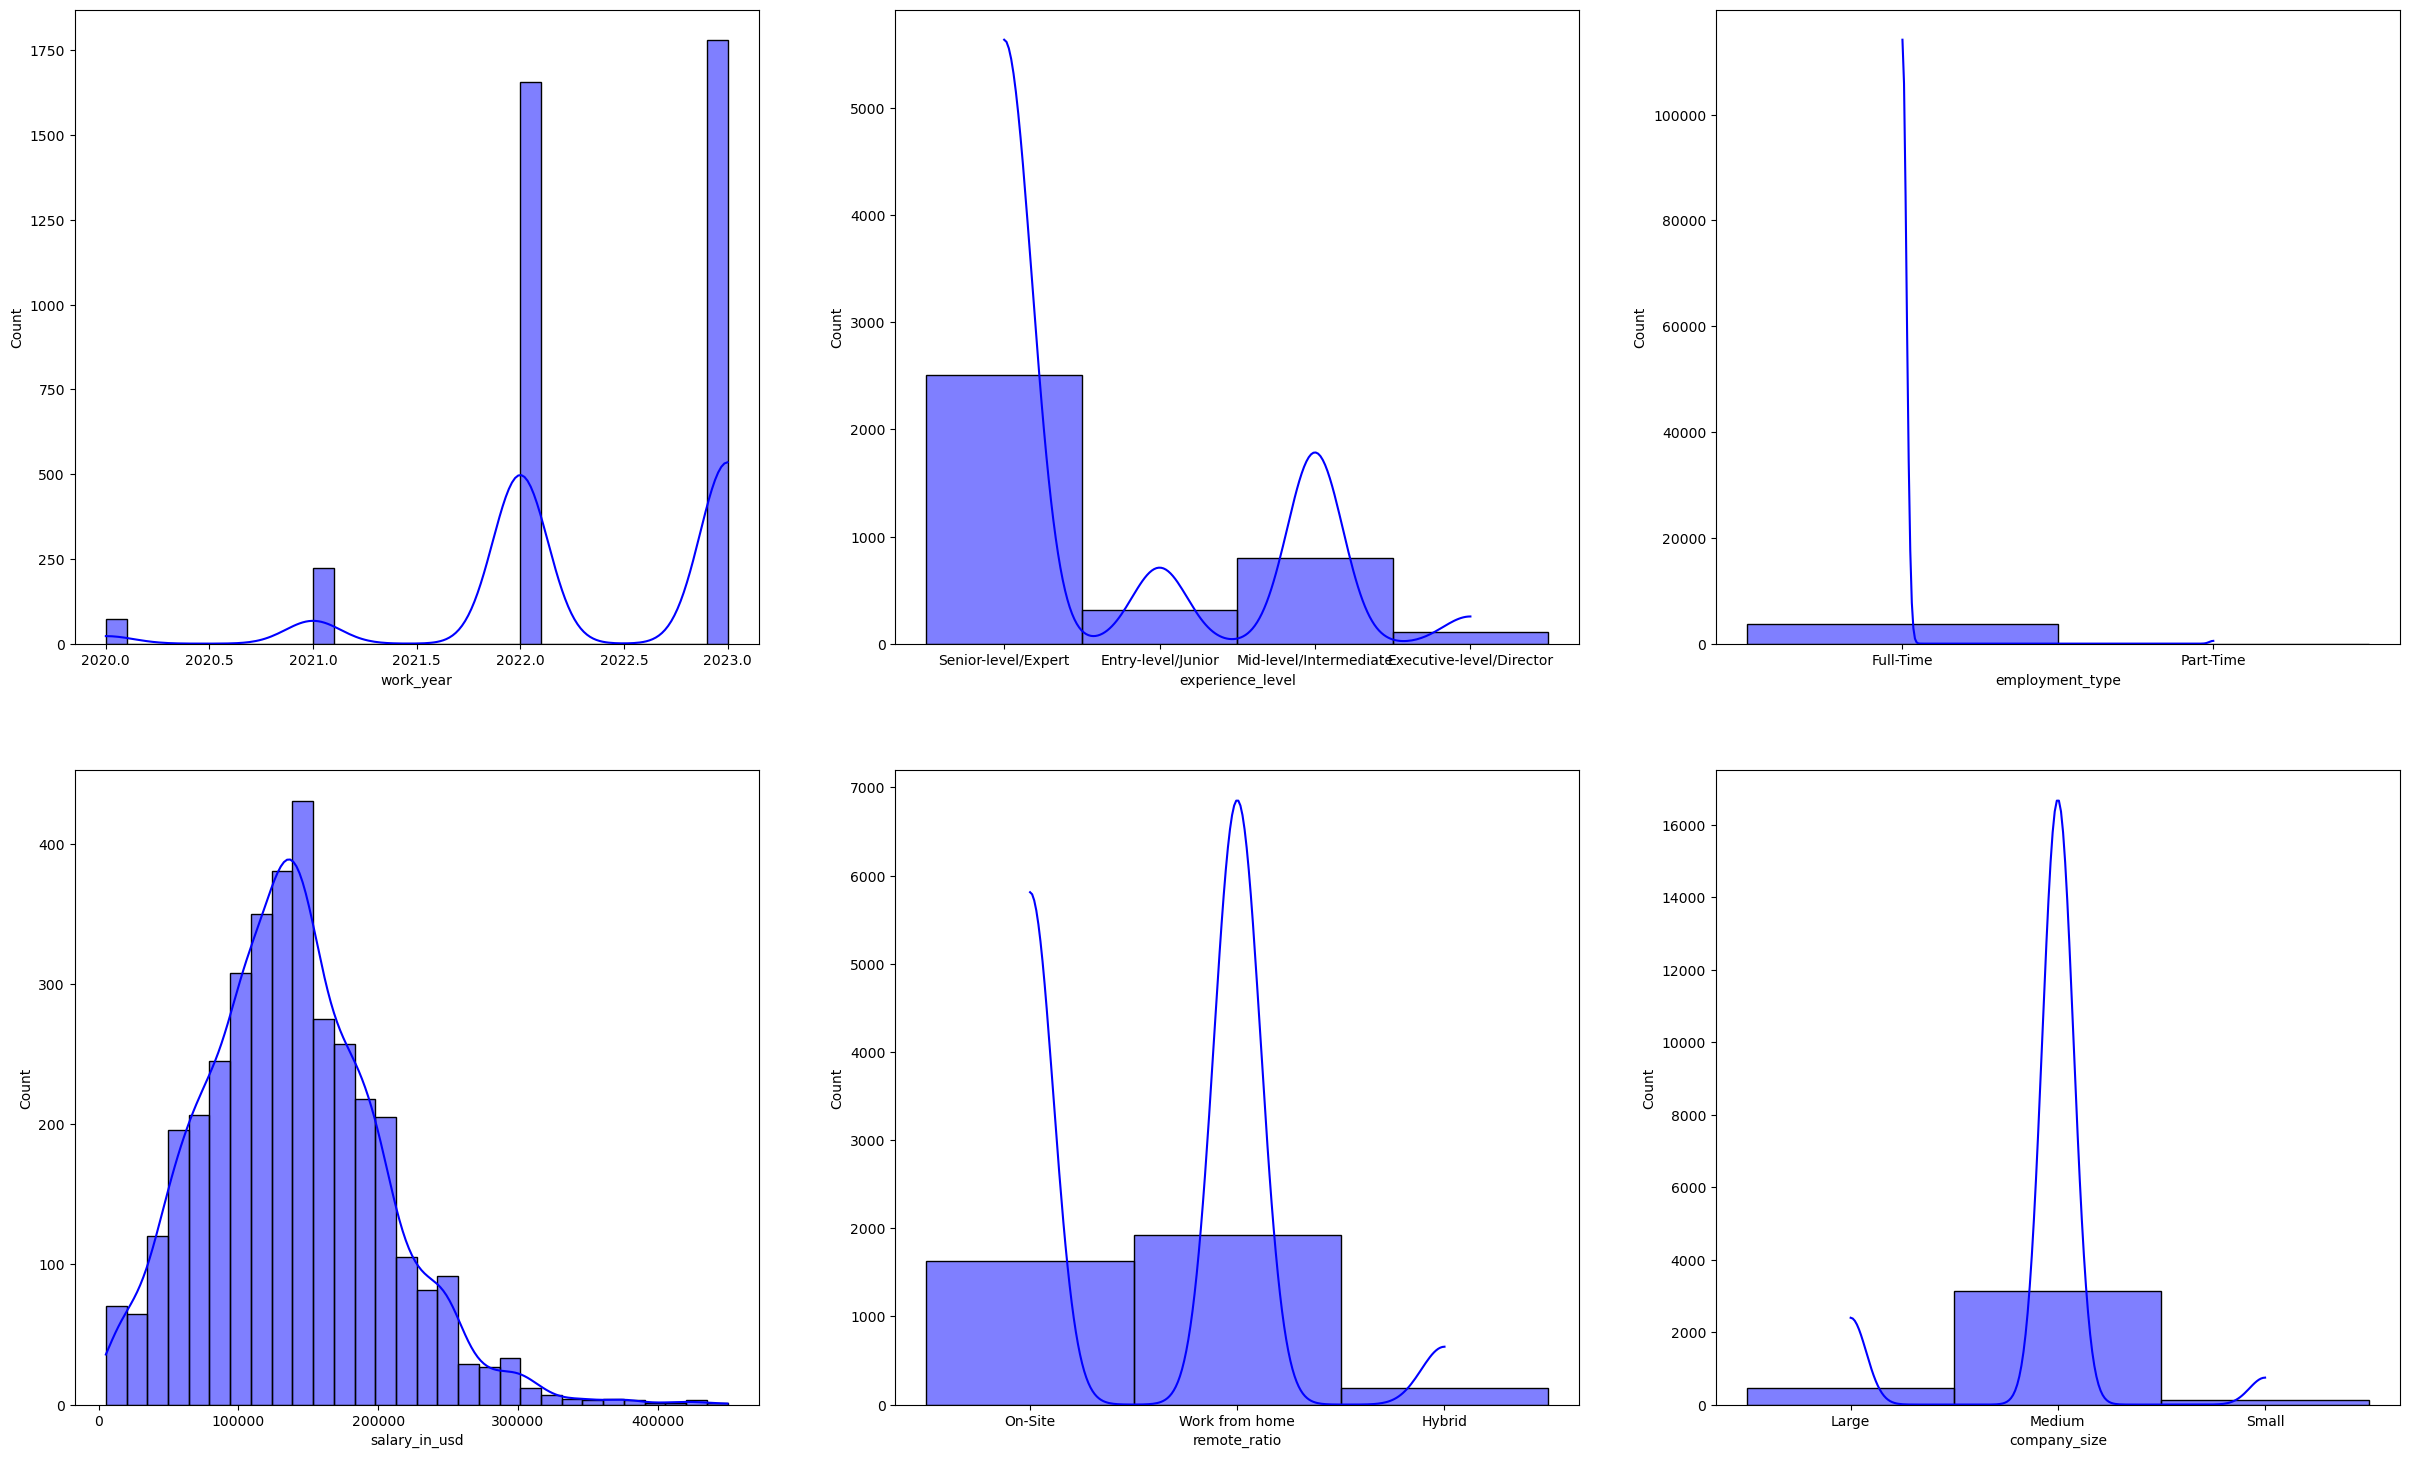

In [25]:
plt.figure(figsize=(30,28))
for i, col in enumerate(['work_year', 'experience_level', 'employment_type','salary_in_usd','remote_ratio', 'company_size']):
    plt.subplot(3, 3, i+1)
    sns.histplot(data = data,
            x = col,
            kde = True,
            bins = 30,
            color = 'blue')

plt.show()

### Top 10 most common job titles

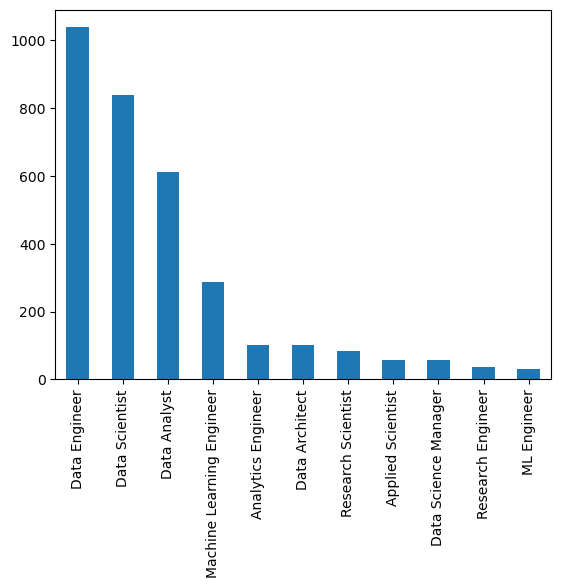

In [26]:
top_10_job=data['job_title'].value_counts()[:11]
top_10_job.plot(kind = "bar")
plt.show()

### Employees with their residence the same as the company location

<Axes: >

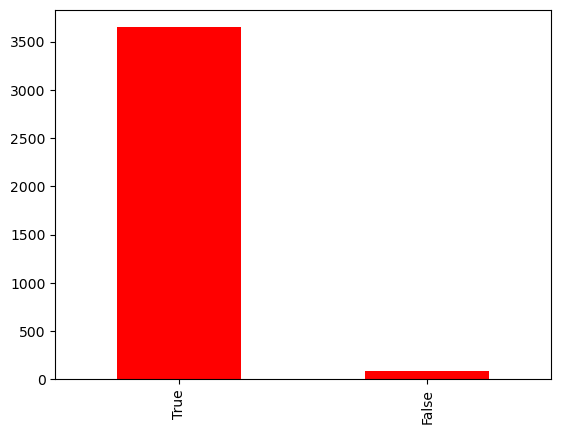

In [27]:
loc=data["company_location"]==data["employee_residence"]
loc.value_counts().plot(kind="bar",color="red")

### Top 10 company location with most employees

<Axes: >

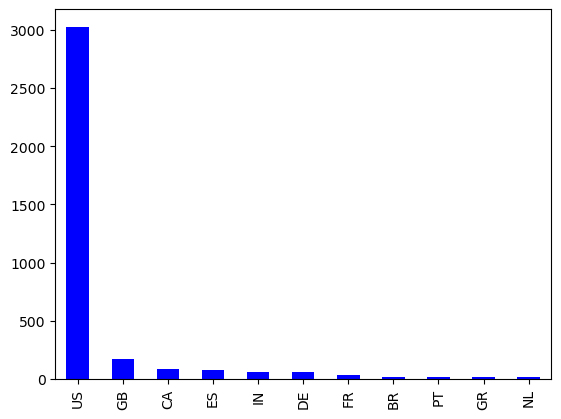

In [28]:
top_10_loc=data.company_location.value_counts()[:11]
top_10_loc.plot(kind="bar",color="blue")

## Multivariate analysis

### Average salary over the years

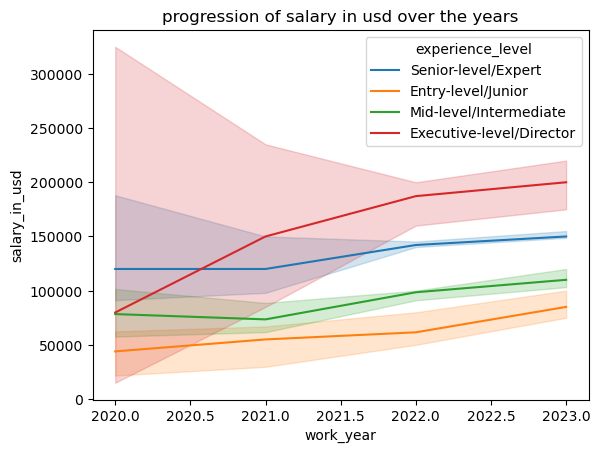

In [29]:
sns.lineplot(data =data ,x="work_year",y="salary_in_usd",estimator=np.median,hue="experience_level")
plt.title("progression of salary in usd over the years")
plt.show()

### Average salary for the top 10 most common jobs

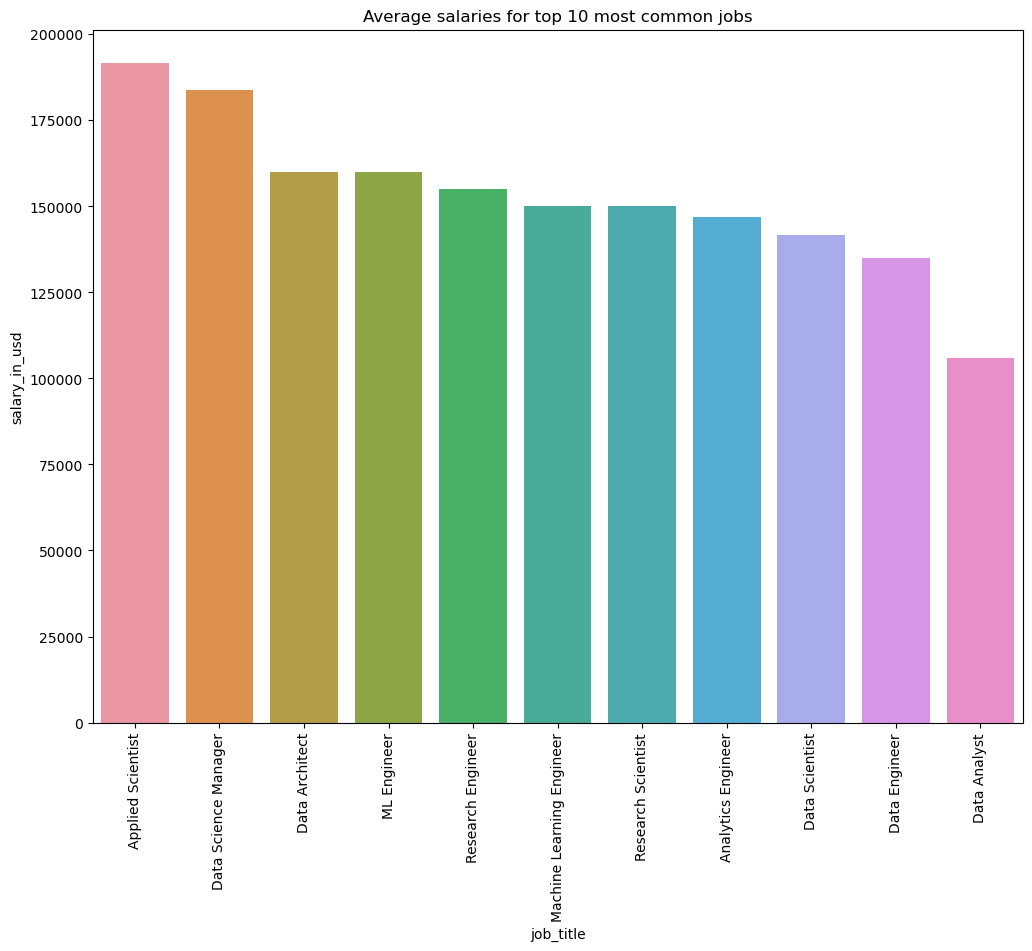

In [30]:
top_common_salaries=data.groupby(data[data.job_title.isin(top_10_job.index.to_list())].job_title)["salary_in_usd"]\
.median()\
.sort_values(ascending=False)\
.reset_index()

plt.figure(figsize=(12,9))
sns.barplot(data=top_common_salaries,x=top_common_salaries.job_title,y=top_common_salaries.salary_in_usd)
plt.xticks(rotation="vertical")
plt.title("Average salaries for top 10 most common jobs")

plt.show()

### Average salary of each employment type in companies of different sizes

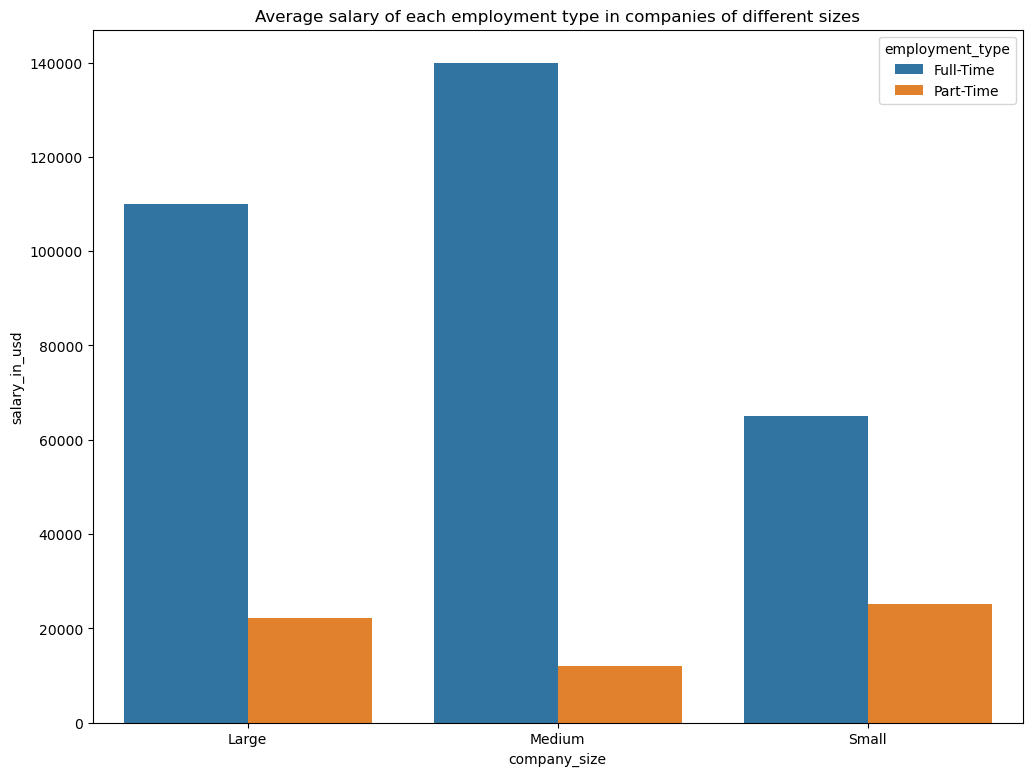

In [31]:
plt.figure(figsize=(12,9))
sns.barplot(data=data,x="company_size",y="salary_in_usd",hue="employment_type",estimator=np.median,errorbar=None)
plt.title("Average salary of each employment type in companies of different sizes")
plt.show()

### Count of company by size

In [32]:
group = data['company_size'].value_counts()

In [33]:
fig = px.bar(y = group.values, x = group.index, 
             color = group.index, text = group.values,
             title = 'Distribution of Company Size')

fig.update_layout(xaxis_title = "Company Size", yaxis_title = "count")
fig.show()

### Count of company by Type-of-job-setting

In [34]:
#remote_R = data['remote_ratio'].value_counts()
#remote_R.plot(kind="bar",color="blue")
remote_type = ['Work from home', 'Hybrid', 'On-site']

fig = px.bar(x = remote_type, y = data['remote_ratio'].value_counts().values,
       color = remote_type, text = data['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution')

fig.update_layout( xaxis_title = "Remote Type", yaxis_title = "count")
fig.show()

### Distribution of AVG salary based on Experience

In [35]:
exp_salary = data[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level/Junior']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level/Director']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Mean Salary by Experience Level'))
                            
fig1.update_layout(title = 'Salary Distribution based on Experience')
fig2.update_layout(xaxis_title = "Experience Level", yaxis_title = "Mean Salary (k) ")
fig1.show()
fig2.show()

### Distribution of AVG salary based on Company size

In [36]:
company_size = data[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'Small']
mid = exp_salary.loc[company_size['company_size'] == 'Medium']
large = exp_salary.loc[company_size['company_size'] == 'Large']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Mean Salary by Company Size'))

fig1.update_layout(title = 'Salary Distribution based onk Company Size')
fig2.update_layout( xaxis_title = "Company Size", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

### Highest salaries based on Designation

In [37]:
salary_designation = data.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Job Designation", yaxis_title = "Salaries ")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'Top 15 Highest Salary by Designation')

### Top 5 Designations based on Experience

In [38]:
exp_job = data.groupby(['experience_level','job_title']).size()

entry_top5 = exp_job['Entry-level/Junior'].sort_values(ascending = False)[:5]
executive_top5 = exp_job['Executive-level/Director'].sort_values(ascending = False)[:5]
mid_top5 = exp_job['Mid-level/Intermediate'].sort_values(ascending = False)[:5]
senior_top5 = exp_job['Senior-level/Expert'].sort_values(ascending = False)[:5]

exp_type = data.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name = 'Entry-level/Junior', x = entry_top5.index, 
           y=entry_top5.values, text = entry_top5.values),
    go.Bar(name = 'Executive-level/Director', x = executive_top5.index,
           y = executive_top5.values, text = executive_top5.values),
    go.Bar(name = 'Mid-level/Intermediate', x = mid_top5.index,
           y = mid_top5.values, text = mid_top5.values ),
    go.Bar(name = 'Senior-level/Expert', x = senior_top5.index,
           y = senior_top5.values, text = senior_top5.values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level with top 5 job designations')
fig.show()

### Wordcloud for most popular Job Designations

In [39]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

In [40]:
def Word_Cloud(data, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width = 1200, height = 600, max_words = 50,
               background_color = 'white',
               max_font_size = 100, random_state = 42)
    wc.generate_from_frequencies(data)
    
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

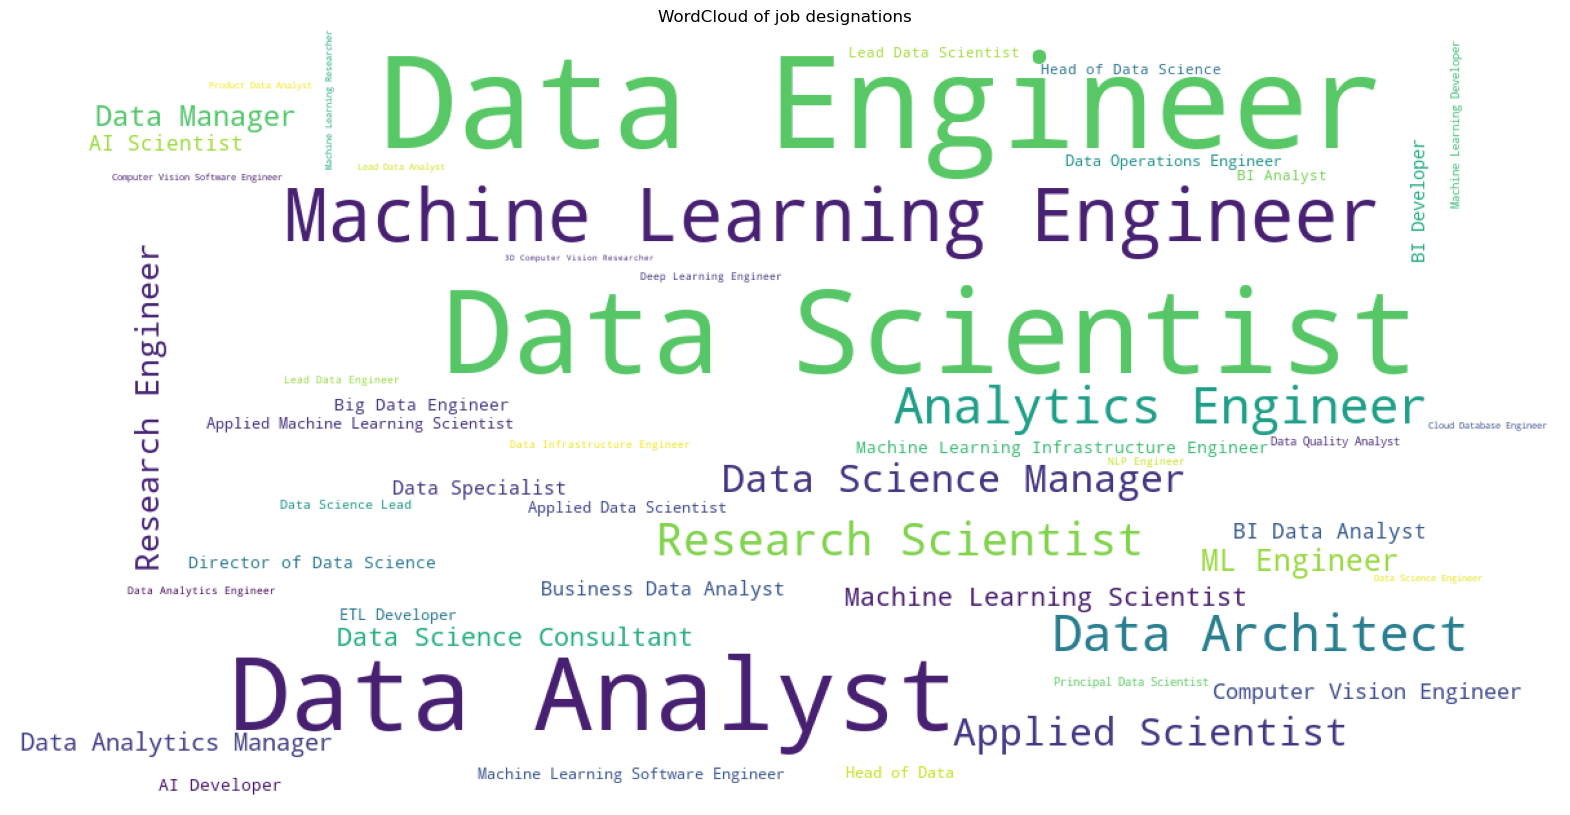

In [41]:
freq_df = Freq_df(data['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data , 'WordCloud of job designations')

Please feel free add/suggest any changes all inputs are welcomed!!

Sincerely,

Sehaj Malhotra